In [9]:
import yaml 

with open('../config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

# Numpy

* Пакет для Python, реализующий многомерные массивы
* Массивы **статически типизированные**. Тип элементов определяется при создании массива.
* Массивы эффективно используют память.
* Методы линейной алгебры в numpy реализованы на C и Fortran, что обеспечивает хорошую производительность.
* Пакет numpy активно используется в научных проектах по всему миру.

In [40]:
import numpy as np

## Создание массивов

Существует несколько способов создания новых numpy массивов:
* через списки и кортежи Python
* используя специальные функции numpy такие, как `arange`, `linspace`, и так далее.
* вычитывая данные из файлов

### 1D массивы:

In [ ]:
a = np.array([0,1,2,3])
a

In [ ]:
type(a), a.dtype

In [ ]:
a.ndim, a.shape, len(a)

In [ ]:
b = np.array((3, 4, 5))
b

В numpy существует множество функций для генерации массивов:

<p style="font-size:16px"><b>`arange`</p></b>

Генерирует значения в интервале [start, stop) с шагом step. Аналог встроенной функции Python `range`. На уровне типов они, конечно, отличаются. `np.arange` возвращает обычный numpy-массив, в то время как `range` является lazy sequence/lazy iterable и стоит в общем ряду с `list` и `tuple`. Funny fact: `range` не является итератором -- он не "иссякает", для него нельзя вызвать `next()` и можно `len()`, но, в отличие от списка, он lazy

In [ ]:
x = np.arange(0, 10, 1) # аргументы: start, stop, step
type(range(10))

In [ ]:
x = np.arange(-1, 1, 0.1)
x

<p style="font-size:16px"><b>`linspace` и `logspace`</b></p>

`linspace` Генерирует равномерно распределенные числа, включая конечные точки.

`logspace` То же, но в логарифмической шкале.

In [ ]:
np.linspace(0, 10, 10) # аргументы: start, stop, число точек

In [ ]:
np.logspace(0.1, 1, 4, base=2)

<p style="font-size:16px"><b>`zeros`, `ones`, `zeros_like` и `ones_like`</b></p>

In [ ]:
np.zeros((5,))   # Аргумент должен быть кортежем

In [ ]:
a = np.ones((4,))
a

In [ ]:
b = np.zeros_like(a)
b

In [ ]:
c = np.ones_like(b)
c

Задание 1. Создайте вектор со значениями от 0 до 65

In [ ]:
d = np.linspace(0, 65, 66)
d

### Многомерные массивы

In [ ]:
# Матрица
m = np.array([[1., 2.], [3., 4.]])
m

In [ ]:
type(m), m.dtype

In [ ]:
m.ndim, np.shape(m), len(m), np.size(m)

При попытке назначить значение другого типа будет выдана ошибка:

In [ ]:
m[0,0] = 'hello' 

<p style="font-size:16px"><b>`zeros`, `ones`, `zeros_like` и `ones_like`</b></p>

In [ ]:
a = np.ones((3, 3))
a

In [ ]:
b = np.zeros((2, 2))
b

<p style="font-size:16px"><b>Другие функции</b></p>

In [ ]:
c = np.eye(3) # единичная матрица
c

In [ ]:
d = np.diag(np.arange(4)) # диагональная матрица
d

**Задание**: Создайте матрицу 3х3 со значениями от 0 до 9

In [ ]:
m = np.array([[1., 2., 3], [4., 5., 6.], [7., 8., 9.]])
m

In [ ]:
np.arange(9).reshape((3,3))

**Задание**: создайте матрицу 9 на 9, заполните случайными значениями и найдите максимальный, минимальный элемент и среднее значение.

In [ ]:
n = np.random.randint(1, 10,(9,9))
np.max(n), np.min(n), np.sum(n)/ 81

## Копирование в NumPy

Как мы помним, в Python при присваивании не происходит копирование объектов. 

In [ ]:
m = np.array([[1, 2], [3, 4]])
m

In [ ]:
n = m

In [ ]:
# Изменение N меняет M
n[0, 0] = 10
n

In [ ]:
m

Глубокая копия создается в NumPy с помощью функции `copy`:

In [ ]:
n = np.copy(m)

In [ ]:
# теперь при изменении N M остается нетронутым
n[0,0] = -5
n

In [ ]:
m

Какой бы shape ни имел массив, в памяти он хранится как обыкновенный линейный массив. В примере показан C-order хранения многомерного массива ("укладываем" массив по строкам 
 последний индекс является самым быстрым). Такие массивы называют C-contiguous. Альтернативой является Fortran-order, где массив "укладывается" по столбцам 
 первый индекс является самым быстрым. Такие массивы называют Fortran-contiguous. Узнать, является ли массив C-contiguous или Fortran-contiguous, мы можем с помощью атрибута flags. В общем случае numpy используется C-order:

In [ ]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
a.flags

In [ ]:
a = np.array([
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9],
])
a.flags

Линейный массив (он же иногда называется буфером), в котором хранятся данные, хранится в атрибуте data. Более конкретно, в нем хранится указатель на первый элемент массива, поэтому работать с ним напрямую мы не можем:

In [ ]:
a.data

Атрибут strides задает шаги в байтах, необходимые для перехода к следующему элементу вдоль того или иного индекса. Например, для двумерного массива типа int16 с shape = (4, 3) и C-contiguous буфером мы получим stride = (3x2, 1x2)

Numpy старается минимизировать количество копирований массивов, в результате чего многие операции, например slicing и в большинстве случаев reshape, возвращают view (представление) массива, а не его копию. Это становится возможным благодаря модификации shape, strides и указателя на первый элемент массива (то есть data). Помня об этом, всегда можно догадаться, произойдет копирование или будет использоваться view: всегда, когда можно построить массив из исходного путем модификации shape, stride и/или сдвига указателя в data, будет использоваться view. Рассмотрим несколько примеров

In [ ]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
], dtype=np.int16)
a.strides

Воспользуемся slicing для взятия каждого второго столбца. Это эквивалентно удвоению stride по второму индексу. Следовательно, будет использоваться view без копирования массива

In [ ]:
b = a[:, ::2]
b.strides

Проверить, является ли массив view, можно, обратившись к атрибуту base: он равен None для скопированных или вновь созданных массивов и равен исходному массиву для view

In [ ]:
b.base

In [ ]:
b.copy().base is None

Аналогично можно убедиться, что slicing для взятие каждой второй строки, начиная со второй, так же даст view без какого-либо копирования. В данном случае происходит удвоение stride по первому индексу и сдвиг указателя вперед на один элемент

In [ ]:
b = a[1::2, :]
b.strides

In [ ]:
b.base

Из этих примеров становится ясно, что все операции slicing-а приводят к появлению view. Более сложная индексация, которую мы рассмотрим ниже, уже приведет к копированию


При изменении представления меняется и изначальный массив:

In [ ]:
a = np.arange(10)
a

In [ ]:
b = a[::2]
b

In [ ]:
b[0] = 12
b

In [ ]:
a # (!!)

In [ ]:
a = np.arange(10)
b = a[::2].copy() # глубокое копирование
b[0] = 12
a

## Слияние массивов

Функции `vstack`, `hstack` и `concatenate` позволяются составить общий массив из нескольких массивов:

<p style="font-size:22px"><b>`concatenate`</b></p>

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

In [ ]:
b = np.array([[5, 6]])
b

In [ ]:
np.concatenate((a, b), axis=0)

In [ ]:
np.concatenate((a, b.T), axis=1)

<p style="font-size:22px"><b>`hstack` и `vstack`</b></p>

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a,b.T))

## Индексация

Доступ к данным массива организуется с помощью индексов и оператора `[]`.

In [ ]:
a = np.arange(10)
a

In [ ]:
a[0], a[2], a[-1]

Для многомерных массивов индексами является кортеж целых чисел:

In [ ]:
m = np.diag(np.arange(3))
m

In [ ]:
m[1, 1]

In [ ]:
m[(1, 1)]

Можно использовать "`:`" для получения доступа к целой колонке или строке: 

In [ ]:
m[1, :] # строка 1

In [ ]:
m[:, 2] # колонка 2

Присваивание новых значений элементам массива:

In [ ]:
m[2, 1] = 10
m

In [ ]:
m[1, :] = 5
m[: ,2] = -1

In [ ]:
m

## Слайсинг

NumPy поддерживает слайсинг, как и списки с кортежами в Python:

In [ ]:
a = np.arange(10)
a

Все три параметра слайсинга являются опциональными: по умолчанию `start` равен **0**, `end` равен последнему элемену и `step` равен **1** в `a[start:stop:step]`:

In [ ]:
a[::] # все параметры слайсинга имеют значения по умолчанию

In [ ]:
a[1:3]

In [ ]:
a[:3]

In [ ]:
a[3:]

In [ ]:
a[2:9:2] 

Отрицательные индексы отсчитываются от конца массива:

In [ ]:
a[-1] # последний элемент массива

In [ ]:
a[-3:] # последние три элемента

Слайсы являются представлениями массива, а потому являются изменяемыми:

In [ ]:
a[1:3] = [-2,-3]
a

**Задание**: разверните массив (1, 2, 3) -> (3, 2, 1)

In [ ]:
a = np.arange(4)
a
a[::-1]

Слайсинг работает точно так же и для многомерных массивов:

In [ ]:
m = np.random.randint(1,100, size=(4, 4))
m

In [ ]:
m[1:4, 1:4]

In [ ]:
m[::2, ::2]

**Задание**: Создайте массив 5х5 и заполните двойками обе диагонали, а нулями все остальное

In [ ]:
m = np.zeros((5,5))
np.fill_diagonal(m, 2)
m = m[::-1, ]
np.fill_diagonal(m, 2)
m

**Задание**: Создайте массив с значениями 1,2,3,4 на 1 поддиагонали 

In [ ]:
n = np.arange(1,5)
m = np.diag(n)
m

## Линейная алгебра

Код, написанный на numpy становится эффективным тогда, когда он достаточно векторизован (т.е. векторные и матричные операции используются в бОльшей части программы).

### Поэлементные операции

Все арифметические операции по умолчанию являются поэлементными:

In [ ]:
a = np.arange(4)
a + 1

In [ ]:
5*a

In [ ]:
2**a

In [ ]:
j = np.arange(5)
2**(j + 1) - j

### Операции между массивами

In [ ]:
a = np.arange(4)
b = np.ones(4) + 3
print('a = ', a)
print('b = ', b)
a - b

In [ ]:
a * b

Сравнения:

In [ ]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

In [ ]:
a > b

Логические операции:

In [ ]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)
np.logical_or(a, b)

In [ ]:
a | b

In [ ]:
np.logical_and(a, b)

In [ ]:
a & b

Использование логических операторов позволяет обращаться к элементам массива через маску:

In [ ]:
c = np.array([1, 2, 3, 4], dtype=int)
d = np.array([1, 2, 5, 6], dtype=int)
c[c == d]

**Задание**: найдите ненулевые элементы массива [1,2,0,0,8,0, 4,1]

In [ ]:
m = np.array([1,2,0,0,8,0, 4,1])
n = np.zeros(8)
m[n!=m]

### Матричная алгебра

Перемножение массивов является поэлементным. Для матричного умножения необходимо использовать функцию `dot`:

In [ ]:
m = np.array([[1., 2.], [3., 4.]])
m

In [ ]:
m * m

In [ ]:
m.dot(m)

**Задание**: Создайте 2 массива 2х4, проверьте, что они одинаковы

In [ ]:
n = np.array([[1., 2.], [3., 4.]])
m = np.array([[1., 2.], [3., 4.]])
n@m == m@m

### Трансформирование массивов

Для транспонирования матриц используется либо `.T`, либо функция `transpose`:

In [ ]:
m

In [ ]:
m.T

In [ ]:
m.transpose()

Метод reshape позволяет изменить shape массива на произвольный shape, дающий то же число элементов, что и оригинальный shape. 

Понять, каким будет конечный вид массива, легко. Достаточно представить, как текущий массив выглядит в линейной форме в соответствии с C-order или F-order в зависимости от аргумента order, передаваемого в reshape (по умолчанию используется C-order), и переписать его в многомерный вид в соответствии с новым shape, используя тот же order. Рассмотрим пример ниже

In [ ]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
], dtype=np.int16)
a.shape

In [ ]:
a.reshape(-1)


Допустим теперь, что мы хотим получить shape = (2, 2, 3). В C-order самым быстрым индексом является последний, следовательно, фиксируя первые два индекса, мы должны получить подмассивы a_1 = [0, 1, 2], a_2 = [3, 4, 5], a_3 = [6, 7, 8] и a_4 = [9, 10, 11]. Их "схлопывание" дает снова линейный массив [a_1, a_2, a_3, a_4]. Снова используя C-order и фиксируя первый индекс, мы получаем два подмассива [a_1, a_2] и [a_3, a_4]. Следовательно, финальный массив будет иметь следующий вид:

[
    [
        [0, 1, 2],
        [3, 4, 5],
    ],
    [
        [6, 7, 8],
        [9, 10, 11],
    ],
]

In [ ]:
a.reshape(2, 2, 3)

**Задание**: Создайте вектор х длины 5 и матрицу А размера 5х4. Перемножьте их, чтобы получить результаты размера [1,5], [5], [4x5] 

In [ ]:
x = np.array([1, 2, 3, 4, 5])

A = np.random.randint(1, 10, (5, 4))

x_row = x.reshape(1, -1)
result_1 = x_row @ A

x_col = x.reshape(-1, 1)
result_2 = x_col * A

result_3 = A.T @ x_col
result_1, result_2, result_3

Другие математические функции:

In [ ]:
c = np.matrix([[1j, 2j], [3j, 4j]])
c

In [ ]:
np.conjugate(c)

Эрмитово-сопряженная матрица(transpose + conjugate):

In [ ]:
c.H

Вещественная и мнимая части могут быть получены с помощью `real` и `imag`:

In [ ]:
np.real(c) # то же: c.real

In [ ]:
np.imag(c) # то же: c.imag

Модули элементов матрицы:

In [ ]:
np.abs(c)

Задание: Извлеките целые части из случайного массива размера 5х5 (с float типом) как минимум 3 разными способами

In [ ]:
m = np.random.uniform(1, 10, (5, 5))
for row in range(m.shape[0]):  
    for col in range(m.shape[1]):  
        m[row, col] = int(m[row, col])  
m

In [ ]:
m = np.random.uniform(1, 10, (5, 5))
np.floor(m)

In [ ]:
m.astype(int)

Задание: создайте двумерный массив, а потом добавьте к нему границу толщины 2 (весь исходный массив должен быть в новом)

In [ ]:
k = 2
l = 3
m = np.random.uniform(1, 10, (k, l))
n = np.zeros((k+4, l+4))
for i in range (k):
    for j in range(l):
        n[i + k, j + l - 1] = m[i,j]
n


Задание: создайте массив 8х8, заполните 0 и 999 в шахматном порядке. 

In [ ]:
m = array = np.full((8, 8), 999)
m[::2, ::2] = 8
m

Задание: создайте массив 8х8, заполните 0 и 999 в шахматном порядке. Используйте функцию tile

In [ ]:
m = np.array([999, 0])
n = np.tile(m, (8, 4))
n

### Матричные вычисления

<p style="font-size:18px"><b>inverse</b></p>

In [ ]:
np.linalg.inv(c) # то же: C.I 

In [ ]:
c.I * c

<p style="font-size:18px"><b>determinant</b></p>

In [ ]:
np.linalg.det(c)

In [ ]:
np.linalg.det(c.I)

Задание: нормализуйте случайный массив

In [50]:
A = np.random.rand(5, 5) * 100 
# Нормализуем массив в диапазон [0,1]
A_norm = (A - A.min()) / (A.max() - A.min())
A_norm

array([[0.49539318, 0.2382894 , 0.21138076, 0.99591647, 0.93901338],
       [0.52942733, 0.71124243, 0.        , 0.87551823, 0.27273283],
       [0.96695348, 0.72354805, 0.97168907, 0.98213797, 0.84487306],
       [0.28616384, 0.2937897 , 0.75367855, 0.1875629 , 0.77373285],
       [0.08888516, 0.17316545, 0.14860808, 1.        , 0.12520788]])

Задание: Создайте квадратные матрицы A, B. Посчитайте ((A+B)*(-A/2)) без копирования массивов.

In [ ]:
A = np.random.randint(1, 10, (5, 5))
B = np.random.randint(1, 10, (5, 5))
temp1 = A + B  
temp2 = (-1 / 2) * A  
result = temp1 @ temp2 
result

## Векторизация функций

Numpy предлагает средства для создания векторизованных оберток над функциями, которые изначально принимают на вход скалярные значения.

In [ ]:
def foo(x):
    if x >= 0:
        return 1
    else:
        return 0

In [ ]:
foo(np.array([-3, -2, -1, 0, 1, 2, 3]))

Эта функция работает для скалярных данных. 

Чтобы это функция принимала векторные значения, необходимо провести векторизацию с помощью функии `vectorize`:

In [ ]:
foo_vec = np.vectorize(foo)

In [ ]:
foo_vec(np.array([-3, -2, -1, 0, 1, 2, 3]))

- Задание: создайте случайный вектор размера 10 и отсортируйте
- Доп.задание: отсортируйте строки двумерной матрицы 6х6

In [7]:
v = np.random.randint(1, 10, 10)
v
for i in range(10):
    for j in range(10):
        if v[i] < v[j]:
            v[i], v[j] = v[j], v[i]
v

array([1, 1, 3, 6, 6, 8, 8, 8, 9, 9])

Задание: Вычтите среднее из строк матрицы.

In [ ]:
v = np.random.uniform(1, 10, (3, 3))
m = np.zeros((3, 1))
for i in range (3):
    m[i][0] = sum(v[i])/3
 v -m

(array([[7.24039486, 8.02686884, 9.4033827 ],
        [4.01542053, 5.10866178, 7.00864939],
        [7.98539472, 6.60624017, 8.43386951]]),
 array([[8.2235488 ],
        [5.37757723],
        [7.67516813]]),
 array([[-0.98315394, -0.19667997,  1.1798339 ],
        [-1.3621567 , -0.26891546,  1.63107216],
        [ 0.31022659, -1.06892796,  0.75870138]]))

Задание: Создайте массив [[1, 0, null, 2, 4, null, 9],[null, 1, 0, -2, null, null, 3]]. Выведите маску, в которой 1 соответствуют null значениям.

In [24]:
a = np.array([[1, 0, None, 2, 4, None, 9],[None, 1, 0, -2, None, None, 3]])
a = a.astype(object)
mask = (a == None).astype(int)
mask

array([[0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1, 1, 0]])

# Matplotlib

* Пакет для Python, используемый для создания качественных 2D визуализацией (есть минимальная поддержка 3D)
* Возможность создавать интерактивные графики
* Добавление множества графиков на один рисунок с кастомным расположением
* Экспорт в различные форматы изображений
* Есть поддержка анимаций

In [ ]:
# Позволяет matplotlib отображать графики сразу в notebook.
%matplotlib inline

## Matplotlib API

Импортирование модуля `matplotlib.pyplot` под именем `plt`:

In [25]:
import matplotlib.pyplot as plt

In [26]:
import numpy as np

Простейший пример построения графиков в matplotlib:

In [ ]:
x = np.linspace(-2., 2., 128, endpoint=True)
y1 = x**2
y2 = np.exp(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel(r'$x \in \mathbb{R}$', fontsize=12)
plt.ylabel(r'$y(x)$', fontsize=12)
plt.show()

Рекомендуется создавать отдельный объект для каждого более-менее сложного графика. Это можно реализоваться, например, с помощью функии `subplots`:

In [ ]:
# Сетка графиков -- 1x1. Размер задается с помощью figsize.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.plot(x, y1, color="blue", linewidth=1.0, linestyle="-")
ax.plot(x, y2, color="green", linewidth=1.0, linestyle="--")
ax.grid()
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
plt.show()

Множественные графики

In [ ]:
# Создаем 2 графика (в 2 колонках)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(x, y1, 'r')
axes[1].plot(x, y2, 'b')
fig.tight_layout()

## Сохранение графиков

Текущий график можно сохранить, вызвав метод `savefig` класса `Figure`:

In [ ]:
fig.savefig("filename.png")

Также можно указать DPI и различные форматы:

In [ ]:
fig.savefig("filename.pdf", dpi=200)

### Легенды, описания осей и графиков

**Заголовок графика**


`axes.set_title("title")`

**Описания осей**


`axes.set_xlabel("x")
axes.set_ylabel("y")`

**Легенда**

Легенды могут создаваться двумя способами. Первый -- явно через метод `legend`:

`axes.legend(["curve1", "curve2"])`

Второй метод -- использование `label="label text"` при вызове `plot` с последующим вызовом метода `legend`: 

`axes.plot(x, x**2, label="curve1")
axes.plot(x, x**3, label="curve2")
axes.legend()`

Также можно выбрать расположение легенды на графике:

`ax.legend(loc=0) # автовыбор
ax.legend(loc='upper right')
ax.legend(loc='upper left')
ax.legend(loc='lower left')
ax.legend(loc='lower right')`

Пример использования описанного выше:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc='upper left');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

**Задание**:
Дан временной ряд дневной цены некоторого актива:

stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])
1) Постройте временной ряд недельного скользящего среднего, то есть скользящего среднего с окном, равным одной неделе. При построении скользящего среднего ряда игнорируйте ту часть исходного временного ряда, где в окно попадает меньше одной недели.
2) Постройте линейный график исходной цены и цены, полученной с помощью скользящего среднего

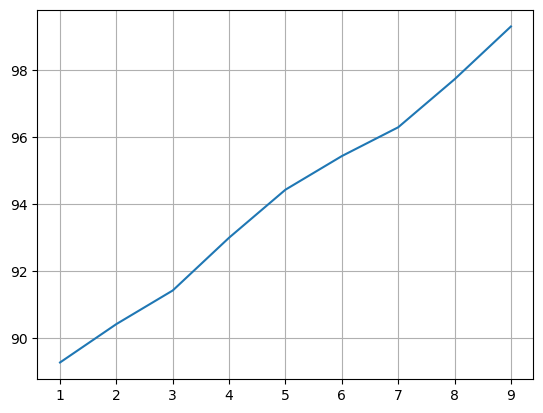

In [36]:
stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])
window = 7
row  = []
for i in range(9):
    row.append(sum(stock_prices[i:i+6])/window)
x = [1,2,3,4,5,6,7,8,9]
plt.plot(x, row)

plt.grid(True)
plt.show()


Интерфейс subplots позволяет создавать сетку из множественных графиков

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(x, y1, "r")  # в этот раз мы используем fmt для задания цвета
axes[1].plot(x, y2, "b")
for ax in axes:
    ax.set_xlabel(r'$x$', fontsize=12)
    ax.set_ylabel(r'$y(x)$', fontsize=12)
    ax.grid()
fig.tight_layout()
plt.show()

**Задание**: создайте график 2х1, постройте графики sin(x), e**(x). Используйте в графике с e**x логарифмическую шкалу (semilogx, semilogy или loglog).

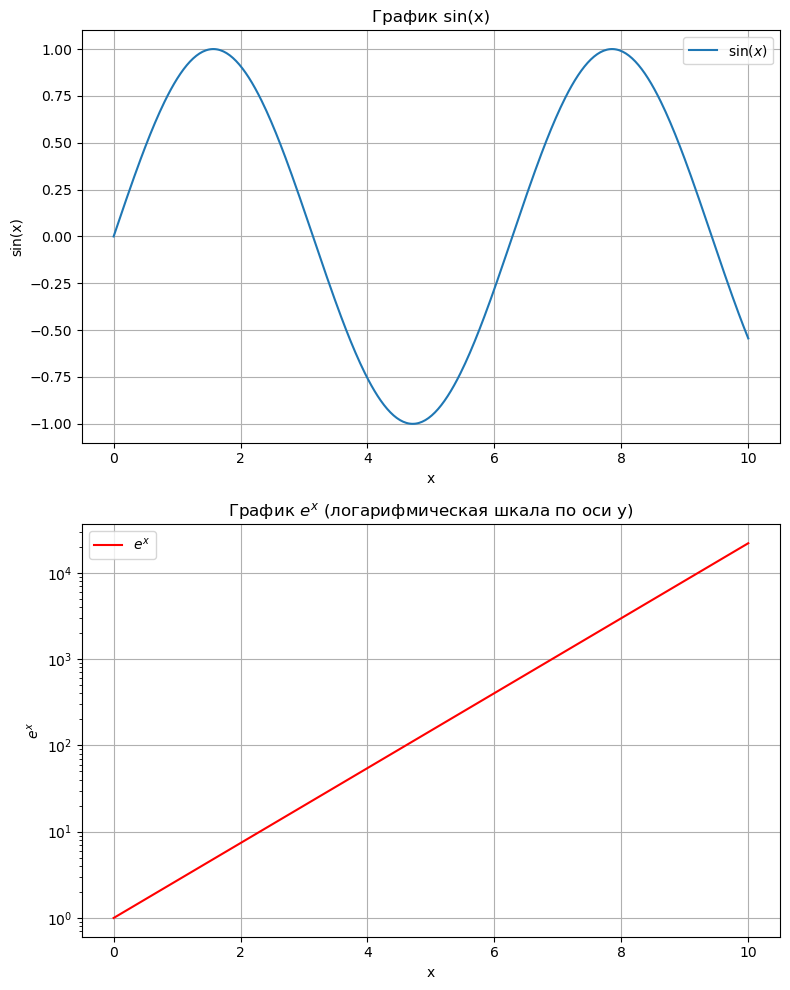

In [51]:
x = np.linspace(0, 10, 400)


y_sin = np.sin(x)
y_exp = np.exp(x)


fig, axs = plt.subplots(2, 1, figsize=(8, 10))


axs[0].plot(x, y_sin, label=r'$\sin(x)$')
axs[0].set_title('График sin(x)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('sin(x)')
axs[0].grid(True)
axs[0].legend()


axs[1].semilogy(x, y_exp, label=r'$e^x$', color='red')
axs[1].set_title('График $e^x$ (логарифмическая шкала по оси y)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('$e^x$')
axs[1].grid(True)
axs[1].legend()


plt.tight_layout()
plt.show()

# Pandas

* Пакет для Python, используемый для представления, манипуляций и анализа табличных данных 
* Строится вокруг эффективно реализованных структур `pd.DataFrame` (таблица) и `pd.Series` (колонка), которые позволяют быстро манипулировать большими датасетами (если они помещаются в памяти, в противном случае необходимо использовать `dask`)
* Поддерживает интерфейс, схожий с numpy массивами, но добавляет поддержку кастомовой табличной индексации
* Часто используется как структура датасета для ML моделей

In [4]:
import pandas as pd

## Создание рядов и датафреймов

Основные манипуляции данными в pandas происходят через `pd.Series` (одномерный массив с кастомной индексацией) и `pd.DataFrame` (двумерный массив с кастомной индексацией и интерпретацией строк и столбцов). В рамках одного столбца (или одного `pd.Series`) тип данных постоянен.

### Создание `pd.Series`

Мы можем создать `pd.Series` напрямую из массива/списка. В этом случае будет создан автоматический индекс от 0 до N - 1, к которому мы всегда можем получить доступ через аттрибут `index`. Сам индекс является отдельным типом, который наследуется от `pd.Index` и представляет immutable последовательность, пригодную для индексации.

In [2]:
a = [1, 3, 5]
s = pd.Series(a)
s

0    1
1    3
2    5
dtype: int64

In [3]:
s.index

RangeIndex(start=0, stop=3, step=1)

Мы также можем задать свой собственный индекс, если он у нас имеется. Для удобства можно представлять себе индекс как первичный ключ в терминах SQL

In [4]:
s = pd.Series(a, index=['x', 'y', 'z'])
s

x    1
y    3
z    5
dtype: int64

In [5]:
s.index

Index(['x', 'y', 'z'], dtype='object')

Создать `pd.Series` мы можем также из словаря, где ключи будут интерпретироваться как индексы.

In [6]:
data = {
    'x': 1,
    'y': 3,
    'z': 5,
}
s = pd.Series(data)
s

x    1
y    3
z    5
dtype: int64

### Создание `pd.DataFrame`

Мы можем представить `pd.DataFrame` как набор `pd.Series`, скрепленных общим индексом. Существует множество способов, как мы можем создать `pd.DataFrame`, но проще всего это сделать с помощью словаря.

In [7]:
people = {
    'first_name': ['Anastasiya', 'Anton', 'Boris'],
    'second_name': ['Nikolskaya', 'Pershin', 'Yeltsin'],
    'sex': ['f', 'm', 'm'],
    'gpa': [4.8, 4.5, 3.5],
}
df = pd.DataFrame(people)
df

,first_name,second_name,sex,gpa
0,Anastasiya,Nikolskaya,f,4.8
1,Anton,Pershin,m,4.5
2,Boris,Yeltsin,m,3.5


Мы также можем загрузить данные из файла. Чаще всего для этого используют csv и соответствующую функции `pd.read_csv()`

In [10]:
df_csv = pd.read_csv(cfg['house_pricing']['train_dataset'])
df_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Доступ к данным в датафрейме

Используя индекс и название столбца, мы всегда можем получить доступ к любому набору данных в датафрейме. Общий интерфейс нам предоставляет оператор `[ ]`, примененный к `loc`. Первым аргументом здесь будет индекс, а вторым -- столбец:

In [10]:
df.loc[1, 'first_name']

'Anton'

И первый, и второй аргументы могут последовательностями, что позволяет получить доступ к любому подмножеству датафрейма, который сам является датафреймом:

In [11]:
df.loc[[0, 1], ['first_name', 'second_name']]

,first_name,second_name
0,Anastasiya,Nikolskaya
1,Anton,Pershin


Есть несколько упрощений для этого синтаксиса. Начнем с доступа по индексу исключительно. Допустим, мы хотим получить строку с индексом 1:

In [12]:
df.loc[1]

first_name       Anton
second_name    Pershin
sex                  m
gpa                4.5
Name: 1, dtype: object

Обратите внимание, что возвращенный объект является инстансом `pd.Series` с индексом `['first_name', 'second_name', 'sex', 'gpa']`:

In [13]:
print(type(df.loc[1]))
df.loc[1].index

<class 'pandas.core.series.Series'>


Index(['first_name', 'second_name', 'sex', 'gpa'], dtype='object')

Мы также можем получить `pd.Series` по одному из столбцов, используя оператор `[ ]` напрямую:

In [14]:
df['first_name']

0    Anastasiya
1         Anton
2         Boris
Name: first_name, dtype: object

Снова можно передать последовательность названий столбцов в `[ ]` для получения подмножества столбцов:

In [15]:
df[['first_name', 'second_name']]

,first_name,second_name
0,Anastasiya,Nikolskaya
1,Anton,Pershin
2,Boris,Yeltsin


Мы также можем комбинировать `loc()` и `[ ]` для получения доступа к любому подмножеству датафрейма (chained indexing). Это легитимно до тех пор, пока нашей задачей является доступ к данным, а не их изменение

In [16]:
df[['first_name', 'second_name']].loc[[0, 1]]

,first_name,second_name
0,Anastasiya,Nikolskaya
1,Anton,Pershin


## Изменение данных в датафрейме

Обратите внимание, что во всех операциях выше возвращался новый инстанс `pd.DataFrame` или `pd.Series`. Возникает естественный вопрос -- происходит в этом случае копирование данных или нет? На этот вопрос нет однозначного ответа -- в одном случае может произойти копирование данных, а в другом будет возвращено их представление. Существуют правила, которые конкретизируют эти случаи [1], но во всех операциях следует использовать наиболее консервативный подход, то есть явные копирования и изменения. Ниже мы рассмотрим частные случаи.

Правило для изменения данных в исходном датафрейме очень простое -- не должно быть никакого chained indexing [2]. В противном случае мы можете получить warning `SettingWithCopy`. Причина состоит в том, что pandas не имеет механизма для отслеживания "представлений в представлениях". После первой индексации будет возвращен датафрейм/ряд, относительно которого нет уверенности -- является ли он копией или представлением.

[1] https://stackoverflow.com/questions/23296282/what-rules-does-pandas-use-to-generate-a-view-vs-a-copy  
[2] https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Предположим, что мы хотим изменить оценку в исходном датафрейме для индекса 1. Мы можем это сделать, избегая chained indexing, используя `loc`:

In [17]:
df.loc[1, 'gpa'] = 4.6
df

,first_name,second_name,sex,gpa
0,Anastasiya,Nikolskaya,f,4.8
1,Anton,Pershin,m,4.6
2,Boris,Yeltsin,m,3.5


Попытка сделать это через chained indexing может не сработать:

In [18]:
df.loc[1]['gpa'] = 4.5
df

/tmp/ipykernel_10298/2292515626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[1]['gpa'] = 4.5


,first_name,second_name,sex,gpa
0,Anastasiya,Nikolskaya,f,4.8
1,Anton,Pershin,m,4.6
2,Boris,Yeltsin,m,3.5


А может и сработать:

In [19]:
df['gpa'][1] = 4.5
df

/tmp/ipykernel_10298/2021360432.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['gpa'][1] = 4.5
/tmp/ipykernel_10298/2021360432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

,first_name,second_name,sex,gpa
0,Anastasiya,Nikolskaya,f,4.8
1,Anton,Pershin,m,4.5
2,Boris,Yeltsin,m,3.5


Именно из-за такой неоднозначности и стоит использовать наиболее явные способы изменения датафреймов.

Еще одним из явных способов является изменение всего столбца через `[ ]`:

In [20]:
df['gpa'] = [5.0, 4.5, 3.2]
df

,first_name,second_name,sex,gpa
0,Anastasiya,Nikolskaya,f,5.0
1,Anton,Pershin,m,4.5
2,Boris,Yeltsin,m,3.2


Если требуется создать копию датафрейма, то следует также создать копию явно: 

In [21]:
df_copy = df.copy()
df_copy.loc[0, 'gpa'] = 4.9
df_copy

,first_name,second_name,sex,gpa
0,Anastasiya,Nikolskaya,f,4.9
1,Anton,Pershin,m,4.5
2,Boris,Yeltsin,m,3.2


## Exploratory data analysis (EDA) 

### Общая информация

Методы `head()` и `tail()` выводят первые (последние соотв.) n строк. Оба метода принимают кол-во выводимых строк как единственный аргумент (по умолчанию 5).

In [11]:
df_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df_csv.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Не все столбцы здесь выведены. Их список мы можем получить, используя аттрибут `columns`:

In [13]:
df_csv.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Базовую информацию о датафрейме (кол-во строк, кол-во столбцов, типы столбцов, кол-во not NaN значений) мы можем получить, используя метод `info()`:

In [14]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

NaN значения регулярно встречаются при работе с реальными датасетами. Как минимум, часто полезно знать их кол-во. Для этого удобно использовать метод `isna()` или `isnull()` (алиас для `isna()`):

In [15]:
df_csv.isna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


Просуммируя столбцы, мы получим кол-во NaN значений в каждом столбце:

In [16]:
df_csv.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Интересно узнать, какие столбцы имеют больше всего NaN значений. Для этого воспользуемся сортировкой:

In [17]:
df_csv.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

**Задание**: найдите максимальное число пустых значений в строке.

In [19]:
df_csv.loc[df_csv.isna().sum(axis=1).idxmax()]

Id                    40
MSSubClass            90
MSZoning              RL
LotFrontage         65.0
LotArea             6040
                  ...   
MoSold                 6
YrSold              2008
SaleType              WD
SaleCondition    AdjLand
SalePrice          82000
Name: 39, Length: 81, dtype: object

**Задание**: сколько строк вообще не имеют пустых значений? Сколько строк имеет не больше одного?

In [22]:
df_csv.dropna().shape[0]
(df_csv.isna().sum(axis=1) <= 1).sum()


np.int64(1)

### Статистическая информация

Основные статистики по столбцам можно получить, вызвав метод `describe()`:

In [23]:
df_csv.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Допустим, что нам интересны статистики только для цены жилья и года постройки:

In [24]:
df_csv[['SalePrice', 'YearBuilt']].describe()

,SalePrice,YearBuilt
count,1460.000000,1460.000000
mean,180921.195890,1971.267808
std,79442.502883,30.202904
min,34900.000000,1872.000000
25%,129975.000000,1954.000000
50%,163000.000000,1973.000000
75%,214000.000000,2000.000000
max,755000.000000,2010.000000


Мы также можем настроить вывод нужных квантилей для лучшего описания распределений, используя ключевое слово `percentiles`:

In [25]:
df_csv[['SalePrice', 'YearBuilt']].describe(percentiles=[0.1, 0.3, 0.5, 0.7, 0.9])

,SalePrice,YearBuilt
count,1460.000000,1460.000000
mean,180921.195890,1971.267808
std,79442.502883,30.202904
min,34900.000000,1872.000000
10%,106475.000000,1924.900000
30%,135500.000000,1958.000000
50%,163000.000000,1973.000000
70%,198620.000000,1997.300000
90%,278000.000000,2006.000000
max,755000.000000,2010.000000


Те же статистики мы можем вычислить отдельно. Например, можно воспользоваться методами `mean()`, `median()`, `std()`

In [26]:
df_csv.mean(numeric_only=True)

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [27]:
df_csv.median(numeric_only=True)

Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float

In [28]:
df_csv.std(numeric_only=True)

Id                 421.610009
MSSubClass          42.300571
LotFrontage         24.284752
LotArea           9981.264932
OverallQual          1.382997
OverallCond          1.112799
YearBuilt           30.202904
YearRemodAdd        20.645407
MasVnrArea         181.066207
BsmtFinSF1         456.098091
BsmtFinSF2         161.319273
BsmtUnfSF          441.866955
TotalBsmtSF        438.705324
1stFlrSF           386.587738
2ndFlrSF           436.528436
LowQualFinSF        48.623081
GrLivArea          525.480383
BsmtFullBath         0.518911
BsmtHalfBath         0.238753
FullBath             0.550916
HalfBath             0.502885
BedroomAbvGr         0.815778
KitchenAbvGr         0.220338
TotRmsAbvGrd         1.625393
Fireplaces           0.644666
GarageYrBlt         24.689725
GarageCars           0.747315
GarageArea         213.804841
WoodDeckSF         125.338794
OpenPorchSF         66.256028
EnclosedPorch       61.119149
3SsnPorch           29.317331
ScreenPorch         55.757415
PoolArea  

Эти статистики отлично подходят для численных столбцов, но множество столбцом в данном датасете представляют категориальные переменные. Для каждого такого столбца мы можем изучить распределение принимаемых значений, используя `value_counts()`:

In [29]:
# TA = typical average, Gd = good, Ex = excellent, Fa = fair
df_csv['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

Мы можем использовать аргумент `normalize=True` для построения функции вероятностей:

In [30]:
df_csv['KitchenQual'].value_counts(normalize=True)

KitchenQual
TA    0.503425
Gd    0.401370
Ex    0.068493
Fa    0.026712
Name: proportion, dtype: float64

Иногда нам необходимо провести анализ внутри подмножеств, полученных группировкой относительно некоторых столбцов. В этом случае полезным оказывается метод `groupby()`:

In [32]:
df_csv.groupby('KitchenQual').mean()

TypeError: agg function failed [how->mean,dtype->object]

Рассмотрев среднюю цену по группам, мы можем сделать очевидный вывод, что жилье с качественной кухней стоит сильно дороже:

In [33]:
df_csv.groupby('KitchenQual')['SalePrice'].mean()

KitchenQual
Ex    328554.670000
Fa    105565.205128
Gd    212116.023891
TA    139962.511565
Name: SalePrice, dtype: float64

### Графики

Несмотря на то, что мы уже знакомы с matplotlib и могли бы воспользоваться им для построения графиков, pandas предоставляет встроенные инструменты, которые особенно удобно использовать в jupyter notebook во время EDA.

Например, построив гистрограмму, можно сразу предположить, что стоимость жилья имеет логнормальное распределение (или по крайней мере несимметричное распределение с тяжелым правым хвостом). При этом метод `plot.hist()` может использован только для числовых столбцов.

<Axes: ylabel='Frequency'>

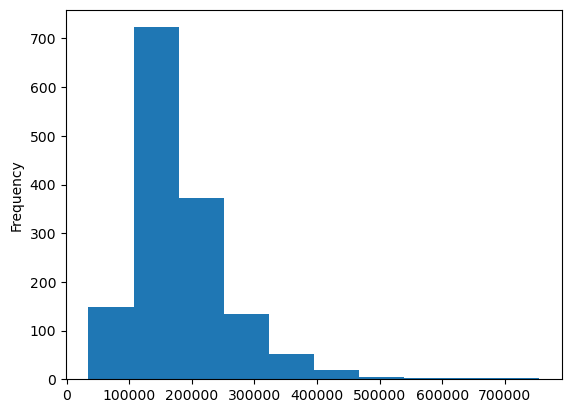

In [34]:
df_csv['SalePrice'].plot.hist()

Используя два столбца и `plot.scatter()`, мы можем взглянуть на зависимость между ними:

<Axes: xlabel='YearBuilt', ylabel='OverallQual'>

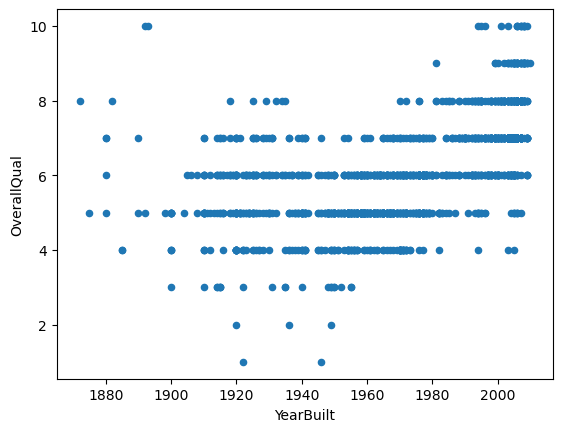

In [35]:
df_csv.plot.scatter(x='YearBuilt', y='OverallQual')

Для категориальных столбцов мы можем вывести распределение значений, используя `value_counts()` и `plot.bar()`. Здесь же мы продемонстрируем, как можно передавать дополнительные аргументы для изменения визуализации

<Axes: xlabel='KitchenQual'>

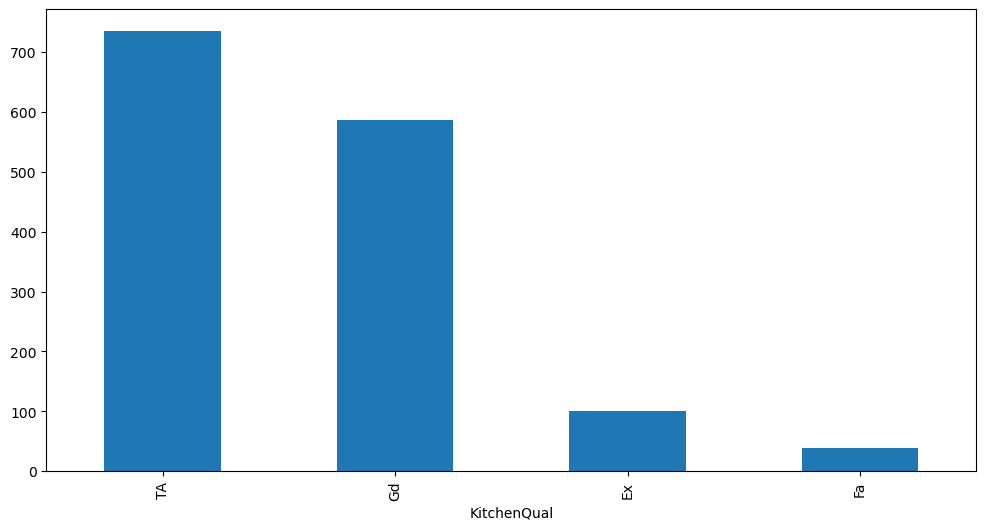

In [36]:
df_csv['KitchenQual'].value_counts().plot.bar(figsize=(12, 6))

**Задание**:
Найдете вме столбцы с  NaN значениями. Отсортируйте по увеличению числа NaN и постройте barplot.

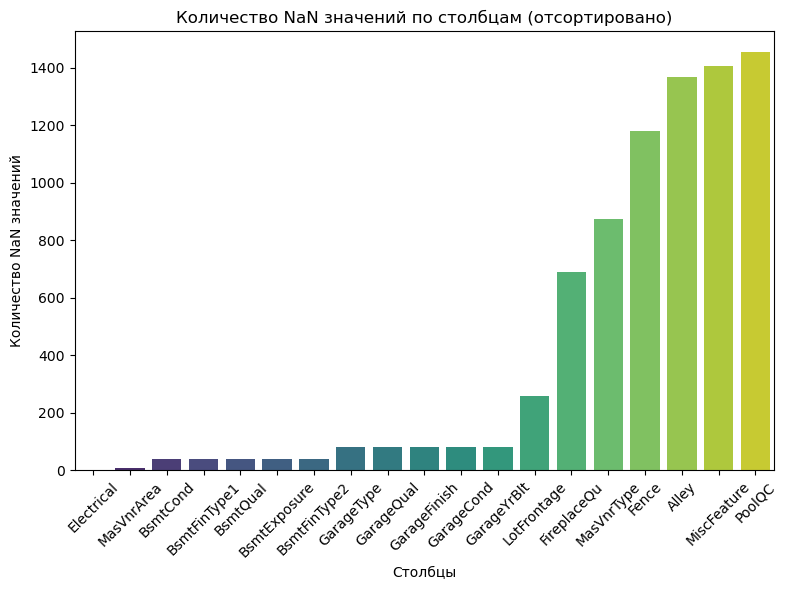

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nan_counts = df_csv.isna().sum()


nan_counts = nan_counts[nan_counts > 0]


nan_counts_sorted = nan_counts.sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(
    x=nan_counts_sorted.index, 
    y=nan_counts_sorted.values, 
    hue=nan_counts_sorted.index,  
    palette='viridis', 
    legend=False  
)

plt.xlabel('Столбцы')
plt.ylabel('Количество NaN значений')
plt.title('Количество NaN значений по столбцам (отсортировано)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Отличный инструмент для графиков  - seaborn. Это обертка над matplotlib, которая также предоставляет более широкий набор опций

<Axes: xlabel='SalePrice', ylabel='Count'>

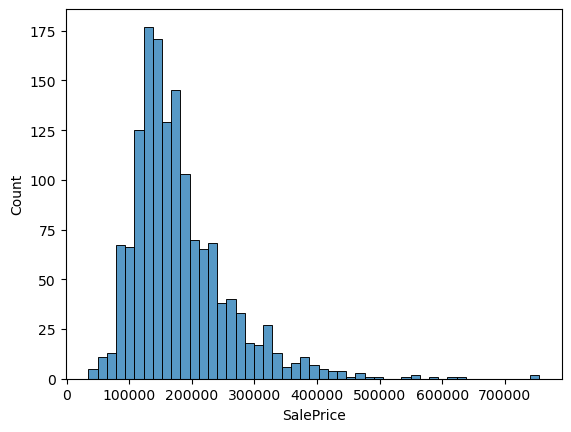

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(df_csv['SalePrice'])

**Задание**: Постройте гистограмму, но с 20 бинами.

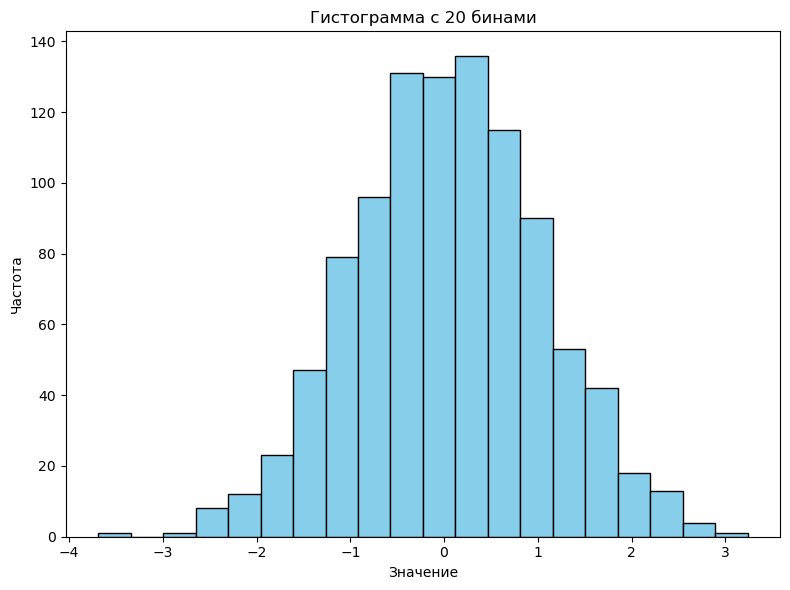

In [41]:
data = np.random.randn(1000)  
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, edgecolor='black', color='skyblue')

# Настройки графика
plt.title('Гистограмма с 20 бинами')
plt.xlabel('Значение')
plt.ylabel('Частота')

# Отображение графика
plt.tight_layout()
plt.show()

Конечно, гистограммы можно строить сразу для нескольких категорий. Посмотрим на цены и продажи в зависимости от квартала.

**Задание**: постройте гистограммы для кварталов (столбец MoSold).

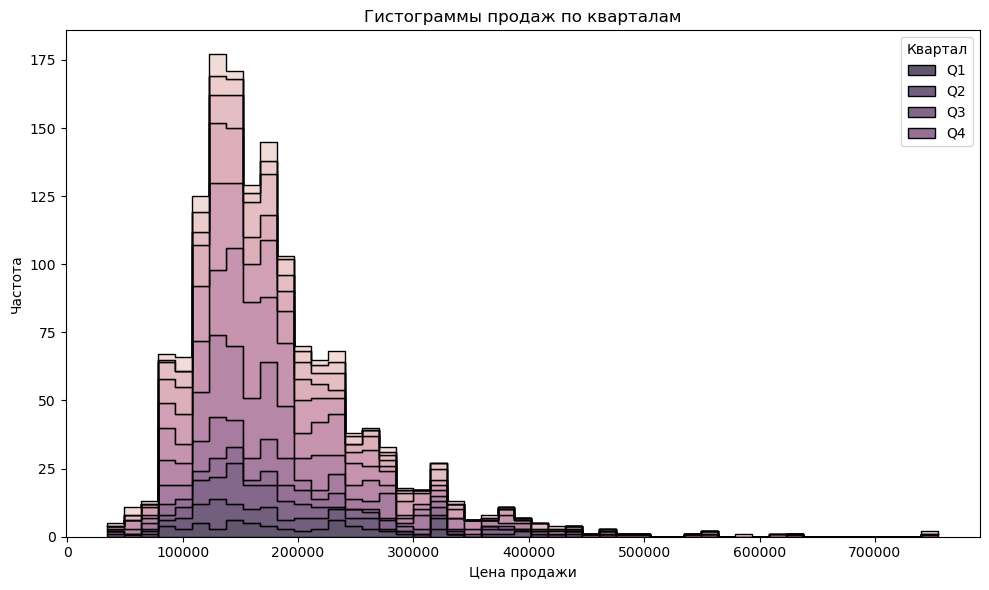

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_csv, x='SalePrice', hue='MoSold', multiple="stack", kde=False, element="step")

# Настройки графика
plt.title('Гистограммы продаж по кварталам')
plt.xlabel('Цена продажи')
plt.ylabel('Частота')
plt.legend(title='Квартал', labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Отображение графика
plt.tight_layout()
plt.show()

**Задание**: Постройте scatterplot через seaborn (scatter) для нескольких пар столбцов из датасета

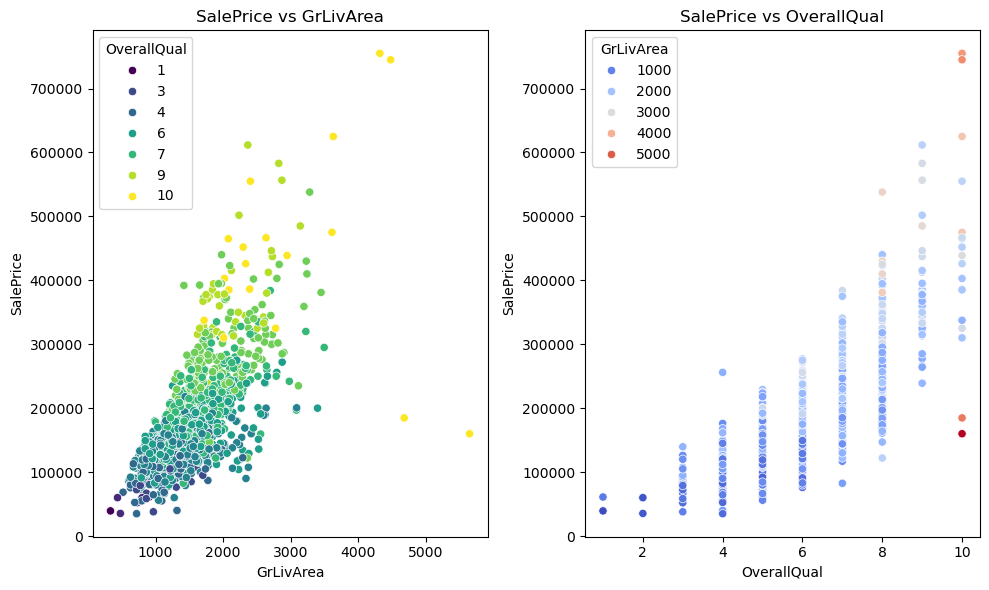

In [43]:
plt.figure(figsize=(10, 6))

# Scatterplot для SalePrice vs GrLivArea
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_csv, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis')
plt.title('SalePrice vs GrLivArea')

# Scatterplot для SalePrice vs OverallQual
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_csv, x='OverallQual', y='SalePrice', hue='GrLivArea', palette='coolwarm')
plt.title('SalePrice vs OverallQual')

# Отображаем графики
plt.tight_layout()
plt.show()

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

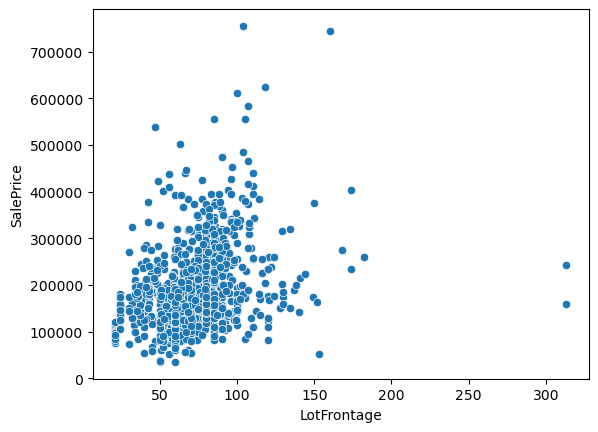

In [46]:
sns.scatterplot(x=df_csv["LotFrontage"], y=df_csv["SalePrice"])


In [44]:
df_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Стиль графиков можно менять, например, поменяв палитру:
```
sns.set(style="whitegrid")
sns.set_palette(["#89CFF0", "#FFB6C1"])
```

Полезно строить графики и для категориальных данных. Например, будет полезно посмотреть на характеристики цены для разных LotShape

Пример такого графика: catplot. В зависимости от значения kind то, как точки будут располагаться на осях. Попробуйте не задавать его и задать "kind"
    

/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categori

/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 51.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


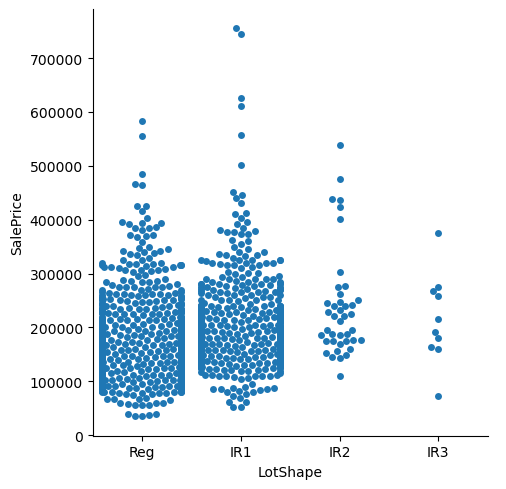

In [45]:
sns.catplot(data=df_csv, x="LotShape", y="SalePrice", kind="swarm")

**Задание**: Постройте этот график, но добавив еще одно измерение с двумя категорими. Как это сделать? Тоже через hue.

/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sasha/miniconda3/lib/python3.12/site-packages/seaborn/categori

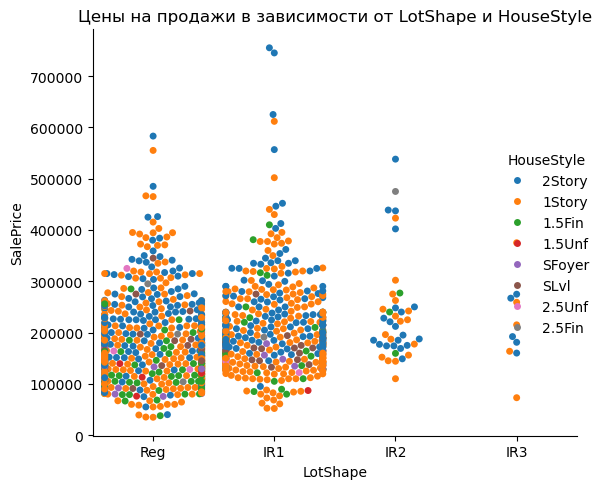

In [49]:
sns.catplot(data=df_csv, x="LotShape", y="SalePrice", kind="swarm", hue="HouseStyle")


plt.title('Цены на продажи в зависимости от LotShape и HouseStyle')
plt.tight_layout()
plt.show()

Есть также и более продвинутые методы. Например, можно построить графики зависимости целевой переменной от других столбцов.

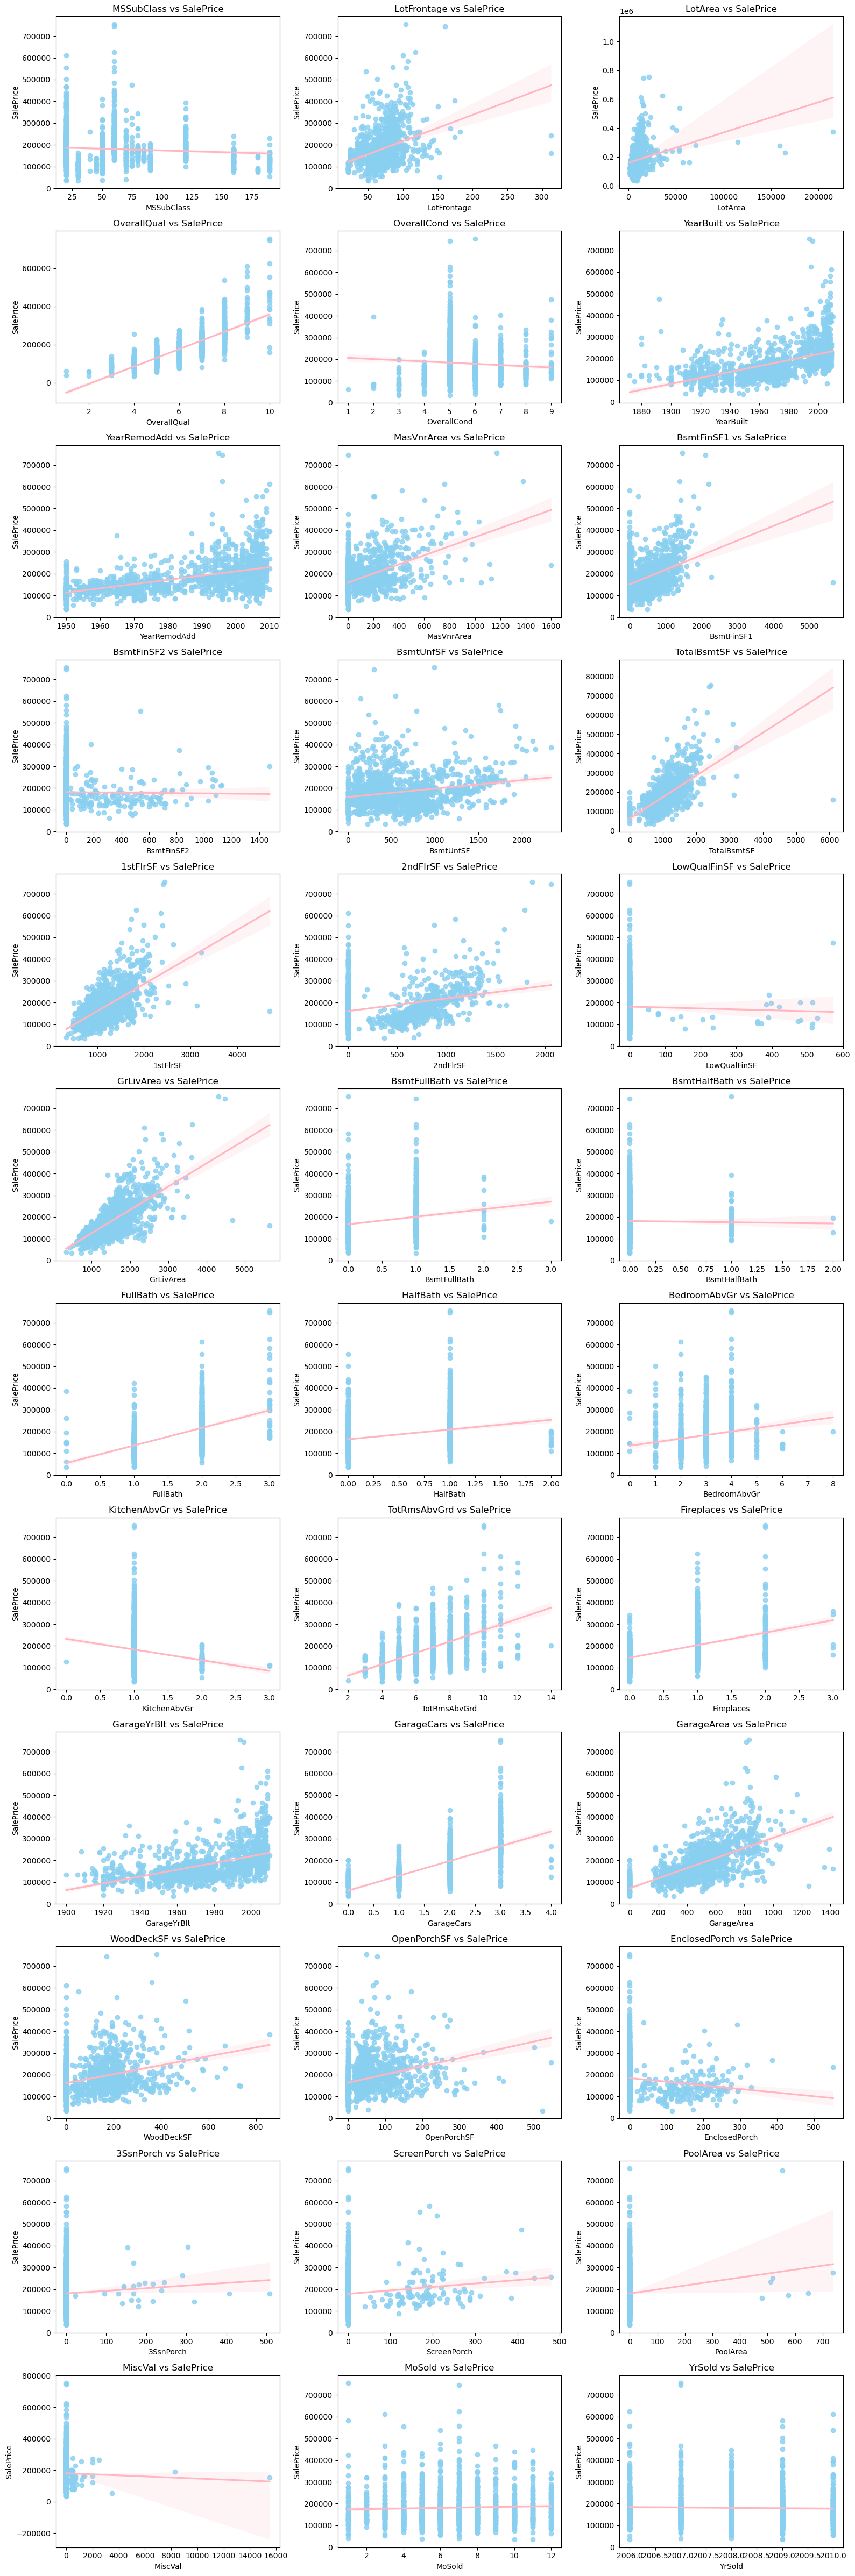

In [47]:
# Выберем все числовые столбцы из датасета, кроме индекса и цены 
numeric_col = list(df_csv.select_dtypes(include=['number']).columns)
numeric_col.remove("Id")
numeric_col.remove("SalePrice")

num_plots = len(numeric_col)
num_columns = 3
num_rows = num_plots // num_columns + (1 if num_plots % num_columns > 0 else 0)

plt.figure(figsize=(16, 4 * num_rows))

for i, col in enumerate(numeric_col):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.regplot(x=df_csv[col], y=df_csv["SalePrice"], scatter_kws={'color': '#89CFF0'}, line_kws={'color': '#FFB6C1'})
    plt.title(f"{col} vs SalePrice")
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    
plt.tight_layout()
plt.show()

Также иногда полезный, а иногда перегруженный график - pairplot. Его можно сделать даже для всего датасета.

**Задание**: сделайте pairplot для нескольких столбцов датасета. Лучше не выбирать больше 5 за раз!

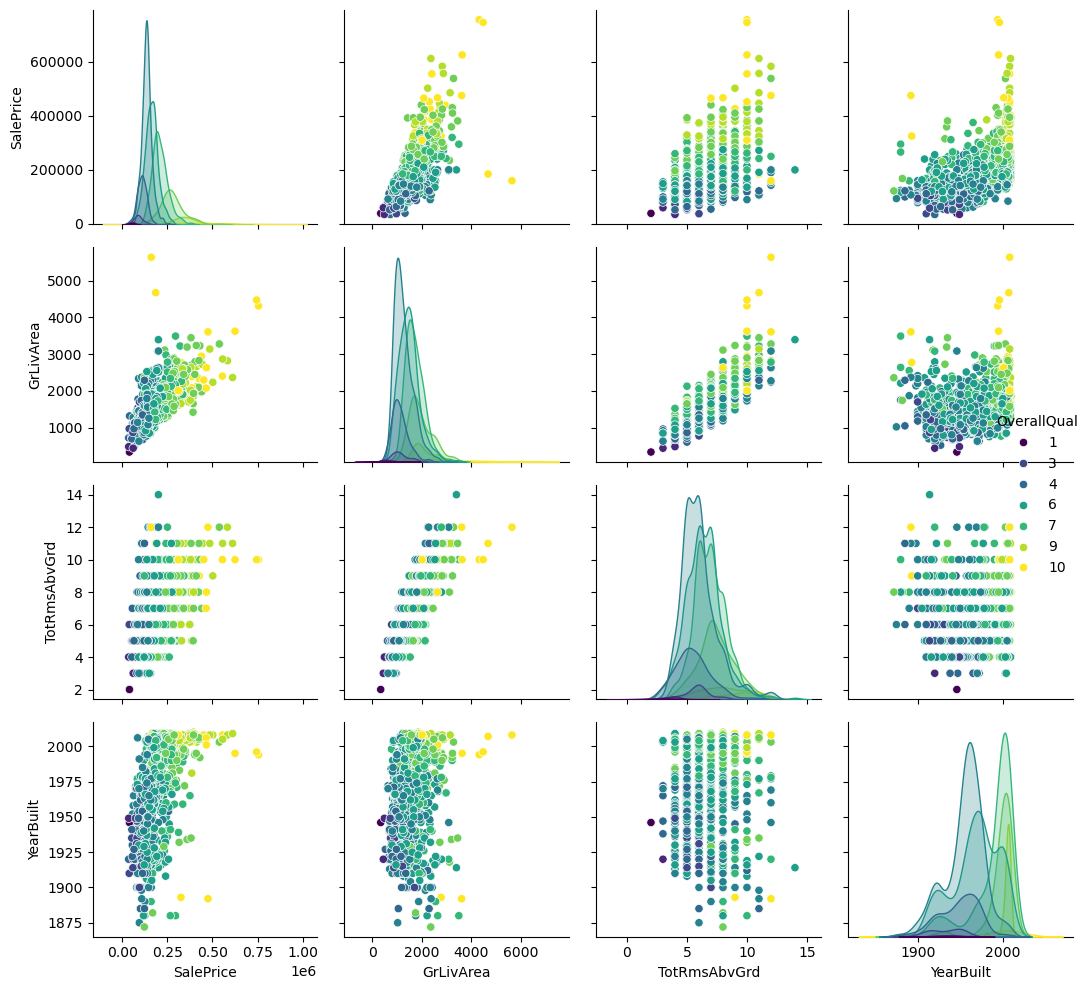

In [48]:
sns.pairplot(df_csv[['SalePrice', 'GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'YearBuilt']], hue="OverallQual", palette="viridis")

# Настройки графика
plt.tight_layout()

# Отображение графика
plt.show()